## Application of ML on churn dataset Using Decision Tree and Logistic Regression

In [106]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [107]:
#Import Dataset
data=pd.read_csv('Churn.csv')
df=data.copy()
df.head() 

,Cust_id,target_flag,w1_IS_CALL_ACTIVE,w1_IS_SMS_ACTIVE,w1_IS_INTERNET_ACTIVE,w1_IS_VAS_ACTIVE,w1_IS_PRODUCT_ACTIVE,w1_IS_RECHARGE_ACTIVE,w1_TOTAL_REVENUE,w1_CALL_COUNT,w1_GPRS_VOLUME,w1_LOAN_COUNT,w1_TOTAL_TRAFFIC_REVENUE,w1_CALL_REVENUE,W1_U_SBSCRP_REV_T6,W1_U_VAS_REV_T6,w1U_IB_VC_CC_CNT_T6,W1_RECH_AMT,W1_U_VAS_LNRTRN_CNT_T6
0,1,0,6,0,4,7,7,5,147.355,23,2401133,0,15.275,10.075,118.0,14.08,7,150.0,0
1,3,0,7,5,6,0,0,0,0.000,36,344088,0,0.000,0.000,0.0,0.00,7,0.0,0
2,4,0,7,7,7,0,2,2,1050.000,111,883985,0,0.000,0.000,0.0,0.00,7,1050.0,3
3,5,0,7,7,1,7,7,3,154.200,40,808,3,110.200,108.200,8.0,66.00,7,150.0,5
4,6,0,6,3,1,3,1,1,350.000,69,399,0,0.000,0.000,0.0,0.00,7,350.0,0


In [98]:
#cleaning data
df.dtypes

Cust_id                       int64
target_flag                   int64
w1_IS_CALL_ACTIVE             int64
w1_IS_SMS_ACTIVE              int64
w1_IS_INTERNET_ACTIVE         int64
w1_IS_VAS_ACTIVE              int64
w1_IS_PRODUCT_ACTIVE          int64
w1_IS_RECHARGE_ACTIVE         int64
w1_TOTAL_REVENUE            float64
w1_CALL_COUNT                 int64
w1_GPRS_VOLUME                int64
w1_LOAN_COUNT                 int64
w1_TOTAL_TRAFFIC_REVENUE    float64
w1_CALL_REVENUE             float64
W1_U_SBSCRP_REV_T6          float64
W1_U_VAS_REV_T6             float64
w1U_IB_VC_CC_CNT_T6           int64
W1_RECH_AMT                 float64
W1_U_VAS_LNRTRN_CNT_T6        int64
dtype: object

In [99]:
#Dropping Customer ID
df=data.drop(['Cust_id'],axis=1)
df.head()

,target_flag,w1_IS_CALL_ACTIVE,w1_IS_SMS_ACTIVE,w1_IS_INTERNET_ACTIVE,w1_IS_VAS_ACTIVE,w1_IS_PRODUCT_ACTIVE,w1_IS_RECHARGE_ACTIVE,w1_TOTAL_REVENUE,w1_CALL_COUNT,w1_GPRS_VOLUME,w1_LOAN_COUNT,w1_TOTAL_TRAFFIC_REVENUE,w1_CALL_REVENUE,W1_U_SBSCRP_REV_T6,W1_U_VAS_REV_T6,w1U_IB_VC_CC_CNT_T6,W1_RECH_AMT,W1_U_VAS_LNRTRN_CNT_T6
0,0,6,0,4,7,7,5,147.355,23,2401133,0,15.275,10.075,118.0,14.08,7,150.0,0
1,0,7,5,6,0,0,0,0.000,36,344088,0,0.000,0.000,0.0,0.00,7,0.0,0
2,0,7,7,7,0,2,2,1050.000,111,883985,0,0.000,0.000,0.0,0.00,7,1050.0,3
3,0,7,7,1,7,7,3,154.200,40,808,3,110.200,108.200,8.0,66.00,7,150.0,5
4,0,6,3,1,3,1,1,350.000,69,399,0,0.000,0.000,0.0,0.00,7,350.0,0


In [100]:
#create dependent and independent variables
X = df.drop(['target_flag'], axis = 1) # Independent Variable
Y = df[['target_flag']] #Dependent Variable
print(X.shape)
print(Y.shape)

(926, 17)
(926, 1)


In [101]:
#Feature Transformation
#feature Normalization
df_w1_IS_CALL_ACTIVE = pd.DataFrame(data= df['w1_IS_CALL_ACTIVE']) 
df_w1_IS_CALL_ACTIVE.head()

,w1_IS_CALL_ACTIVE
0,6
1,7
2,7
3,7
4,6


Text(0.5,1,'Churner to Non-Churner')

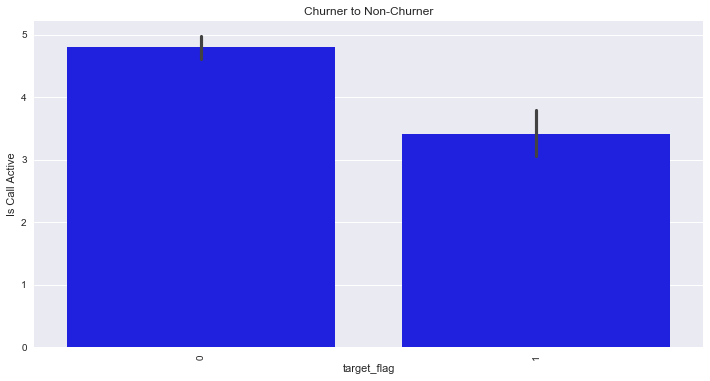

In [102]:
plt.figure(figsize=(12,6))
sns.barplot(x="target_flag",y="w1_IS_CALL_ACTIVE", data=df, color='b')
plt.ylabel("Is Call Active")
plt.xlabel("target_flag")
plt.xticks(rotation=90)
plt.title("Churner to Non-Churner")

In [103]:
#Text(0.5, 1.0, 'Churner to Non-Churner')

In [104]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()

,w1_IS_CALL_ACTIVE,w1_IS_SMS_ACTIVE,w1_IS_INTERNET_ACTIVE,w1_IS_VAS_ACTIVE,w1_IS_PRODUCT_ACTIVE,w1_IS_RECHARGE_ACTIVE,w1_TOTAL_REVENUE,w1_CALL_COUNT,w1_GPRS_VOLUME,w1_LOAN_COUNT,w1_TOTAL_TRAFFIC_REVENUE,w1_CALL_REVENUE,W1_U_SBSCRP_REV_T6,W1_U_VAS_REV_T6,w1U_IB_VC_CC_CNT_T6,W1_RECH_AMT,W1_U_VAS_LNRTRN_CNT_T6
0,0.857143,0.000000,0.571429,1.000000,1.000000,0.833333,0.140338,0.065903,0.134671,0.0,0.035043,0.028064,0.280952,0.110449,1.0,0.142857,0.0
1,1.000000,0.714286,0.857143,0.000000,0.000000,0.000000,0.000000,0.103152,0.019299,0.0,0.012970,0.000000,0.000000,0.000000,1.0,0.000000,0.0
2,1.000000,1.000000,1.000000,0.000000,0.285714,0.333333,1.000000,0.318052,0.049580,0.0,0.012970,0.000000,0.000000,0.000000,1.0,1.000000,0.3
3,1.000000,1.000000,0.142857,1.000000,1.000000,0.500000,0.146857,0.114613,0.000045,0.5,0.172217,0.301393,0.019048,0.517728,1.0,0.142857,0.5
4,0.857143,0.428571,0.142857,0.428571,0.142857,0.166667,0.333333,0.197708,0.000022,0.0,0.012970,0.000000,0.000000,0.000000,1.0,0.333333,0.0


In [105]:
#splitting data into training and testing sets

In [55]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(648, 17) (648, 1)
(278, 17) (278, 1)


In [56]:
#Decision tree claasifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=100)
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [57]:
dt_pred = clf_dt.predict(xtest)

In [33]:
 pred['kmean-clusters'].value_counts()

2    246
1    195
0    174
3    170
4    141
Name: kmean-clusters, dtype: int64

In [ ]:
#Accuracy, F1 socore for decision tree

In [58]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_dt = accuracy_score(ytest,dt_pred)
accuracy_dt

0.7877697841726619

In [59]:
f1score=f1_score(ytest,dt_pred)
f1score

0.06349206349206349

In [60]:
featureImportance = clf_dt.feature_importances_

In [61]:
features_tuple = list(zip(X.columns, clf_dt.feature_importances_))

In [62]:
feature_imp=pd.DataFrame(features_tuple, columns = ['Feature Names', 'Importance'])
feature_imp= feature_imp.sort_values(by='Importance',ascending=False)

In [63]:
feature_imp

,Feature Names,Importance
14,w1U_IB_VC_CC_CNT_T6,0.371465
13,W1_U_VAS_REV_T6,0.172560
2,w1_IS_INTERNET_ACTIVE,0.133251
8,w1_GPRS_VOLUME,0.129731
10,w1_TOTAL_TRAFFIC_REVENUE,0.090415
3,w1_IS_VAS_ACTIVE,0.060962
16,W1_U_VAS_LNRTRN_CNT_T6,0.041615
7,w1_CALL_COUNT,0.000000
1,w1_IS_SMS_ACTIVE,0.000000
9,w1_LOAN_COUNT,0.000000


Text(0.5,1,'Decision Classifier - Features Importance')

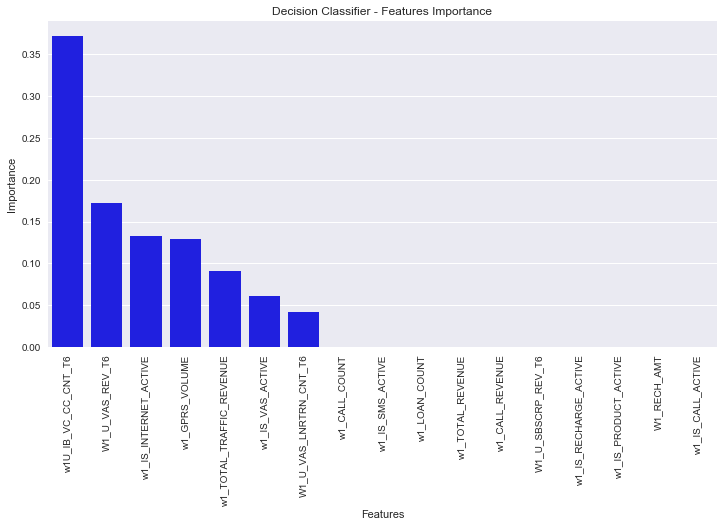

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

In [65]:
#logistic regression classifier

In [66]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=101)
clf_lr.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
lr_pred = clf_lr.predict(xtest)

In [68]:
#Accuracy for logistic regression

In [69]:
#Accuracy
from sklearn.metrics import accuracy_score, f1_score
accuracy_lr = accuracy_score(ytest,lr_pred)
accuracy_lr

0.8201438848920863

In [70]:
#F1 score
f1score=f1_score(ytest,lr_pred)
f1score

0.1935483870967742

In [73]:
#Logistic Regression is choosen for Prediction as it has better accuracy than Decision Trees
#Now, gridSearch will be applied for further tune Logistic Regression

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

# Initialize the classifier
clf = LogisticRegression()

# Create the parameters list you wish to tune
parameters = {'solver': ['newton-cg', 'lbfgs', 'sag'],
              'C': [0.01, 0.1, 1.0, 10.0, 100.0]
             }

In [75]:
# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(xtrain, ytrain)

# Get the estimator
best_clf = grid_fit.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [84]:
# Make predictions using the unoptimized and model
predictions = (clf.fit(xtrain, ytrain)).predict(xtest)
best_predictions = best_clf.predict(xtest)

# Make predictions using the unoptimized and model
predictions = (clf.fit(xtrain, ytrain)).predict(xtest)
best_predictions = best_clf.predict(xtest)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(ytest, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(ytest, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(ytest, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(ytest, best_predictions, beta = 0.5)))

# show best parameters
print ("\nBest Classifier\n------")
print (best_clf)


Unoptimized model
------
Accuracy score on testing data: 0.8201
F-score on testing data: 0.2970

Optimized Model
------
Final accuracy score on the testing data: 0.8094
Final F-score on the testing data: 0.3101

Best Classifier
------
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
#Turned decision tree model
#getting best_estimator
tuned_dt_grid=DT_cv2.best_estimator_
tuned_dt_grid

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [86]:
#fitting the model
tuned_dt_grid.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [87]:
#getting predictions
tuned_dt_grid_pred=tuned_dt_grid.predict(xtest)

In [88]:
#Accuracy & F1 Score of Tuned Tree Model

In [89]:
accuracy_tuned=accuracy_score(ytest,tuned_dt_grid_pred)
accuracy_tuned

0.7877697841726619

In [90]:
f1_score_tuned=f1_score(ytest,tuned_dt_grid_pred)
f1_score_tuned

0.06349206349206349

In [91]:
#Feature Importance of Tuned Tree Model

In [92]:
featureImportance = clf_dt.feature_importances_

In [93]:
features_tuple = list(zip(X.columns, clf_dt.feature_importances_))

In [94]:
feature_imp=pd.DataFrame(features_tuple, columns = ['Feature Names', 'Importance'])
feature_imp= feature_imp.sort_values(by='Importance',ascending=False)

Text(0.5,1,'Decision Classifier - Features Importance')

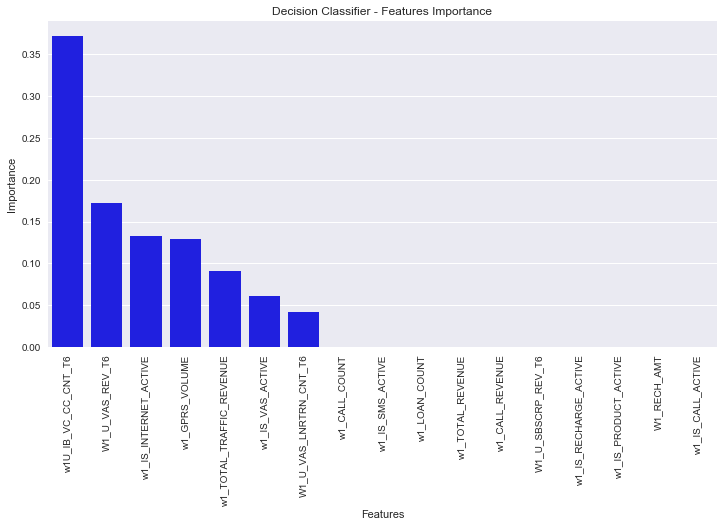

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")